In [2]:
import json, os,sys
import numpy as np
sys.path.append('C:\\Users\\dell\\Desktop\\phasemapy')
from copy import deepcopy
from pymatgen.core import Element
from monty.json import MontyDecoder, MontyEncoder
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample
import matplotlib.pyplot as plt

In [13]:
chemsys = ['Cu', 'Fe', 'V']
oxide_system = True
photon_e = 13e3
max_q_shift = 0.05
resample_density = 1000
initial_alphagamma = 0.1
SUM_NORM = 6000
loss_weight = {'xrd_loss': 6.0, 'comp_loss': 2.0, 'entropy_loss': 0.2}
#load  609 raw instance data 
instance_data = InstanceData.from_file('Fe-Cu-V-O-raw_background.txt', chemsys, photon_e)
#load 9 vocalno instance data'XRD by JADE: samples_near_volcano_sno2[1] is 2Theta, [2:10] is intensity
samples_near_volcano= np.load('samples_near_volcano.npy',allow_pickle=True).tolist()



In [14]:
# replace selected 9 XRD in instance_data with samples_near_volcano 
nn = [83, 84, 107, 108, 109, 110, 134, 135, 136]
i = 1
for n in nn:
    instance_data.sample_xrd[n] = samples_near_volcano[i]
    i +=1    

In [19]:
#load entry poor: 75 ICDD. SnO2, volcano phase
with open('icdd_entries.json') as f:
    entries = json.load(f, cls=MontyDecoder)


In [93]:
from scipy.constants import h, c, e

In [156]:
import json

def creat_vocalno_instance_data(instance_index, log_q, instance_xrd, instance_comp, photon_e,wavelength):
    dict_instance_info = {
                       'log_q': log_q,
                       'instance_xrd': instance_xrd, 
                       'instance_comp': instance_comp, 
                       'photon_e': photon_e,
                        'wavelength':wavelength
                      }
    dict_connection = {'instance_info': dict_instance_info}
    dict_instance_index = {'instance_index': instance_index}  
    data = dict( dict_instance_index, **dict_connection)
    return data


if __name__ == '__main__':
    data_vocalno_instance=[]
    for i in nn:        
        instance_index = i
        log_q = instance_data.log_q.tolist()
        instance_xrd = instance_data.sample_xrd[i].tolist()
        instance_comp = instance_data.sample_comp[i].tolist()
        photon_e = instance_data.photon_e
        wavelength = 1e10 * h * c / (photon_e * e)
        json_founc = creat_vocalno_instance_data
        data = json_founc(instance_index, log_q, instance_xrd, instance_comp, photon_e, wavelength)         
        data_vocalno_instance.append(data)
        
    data_vocalno_instance = json.dumps(data_vocalno_instance)
    with open('data_vocalno_instance.json','w+') as file:
            file.write(data_vocalno_instance)       


In [161]:
with open('data_vocalno_instance.json') as f:
    vocalno_instance_data = json.load(f, cls=MontyDecoder)

In [340]:
vocalno_instance_data[0]['instance_info'].keys()

dict_keys(['log_q', 'instance_xrd', 'instance_comp', 'photon_e', 'wavelength'])

In [338]:
vocalno_instance_data[0]['instance_info'][]

{'instance_index': 83,
 'instance_info': {'log_q': [2.2027415530227183,
   2.206139168475793,
   2.2095252792156623,
   2.212898869061596,
   2.216262206213357,
   2.219614269236425,
   2.22295405057474,
   2.226283794180084,
   2.2296024873777984,
   2.2329091311111067,
   2.2362059456094836,
   2.2394919268275597,
   2.2427660840843733,
   2.2460306143955493,
   2.2492845222166107,
   2.2525268251208743,
   2.2557596974021066,
   2.2589821518905016,
   2.2621932142940513,
   2.2653950366609035,
   2.268586640071866,
   2.2717670582519385,
   2.2749384214648107,
   2.278099758919998,
   2.2812501122437703,
   2.2843915903620813,
   2.2875232304933792,
   2.2906440820513945,
   2.293756233057225,
   2.296858728620599,
   2.2999506258308062,
   2.3030349917744104,
   2.306108877167662,
   2.3091733427375662,
   2.3122284460412788,
   2.3152742441100336,
   2.3183107934555283,
   2.3213381500762154,
   2.3243563694635005,
   2.327365506607843,
   2.330365616004771,
   2.3333567516607996,

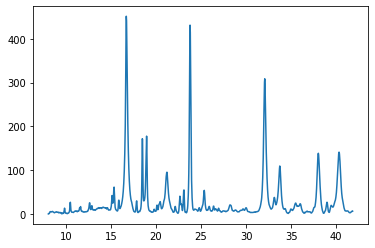

In [209]:
plt.plot(samples_near_volcano[0],samples_near_volcano[1])

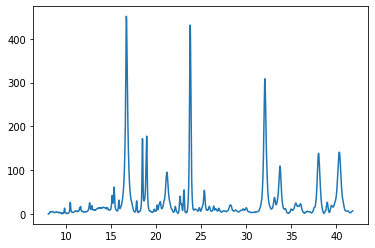

In [226]:
#two theta by JADE
plt.plot(samples_near_volcano_sno2[0],samples_near_volcano_sno2[1])

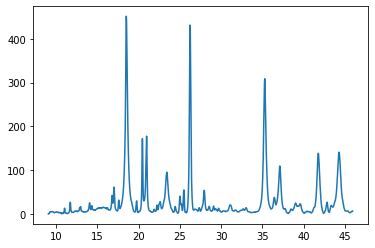

In [228]:
plt.plot(instance_data.q,instance_data.sample_xrd[83])

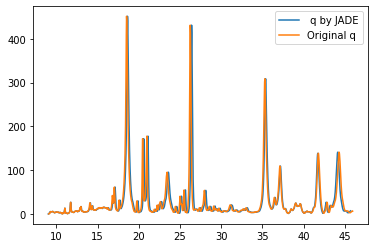

In [311]:
fig, ax = plt.subplots() 
ax.plot(a,samples_near_volcano_sno2[1], label=' q by JADE') 
ax.plot(instance_data.q,instance_data.sample_xrd[83],label='Original q') 
ax.legend() 
plt.show() 

In [314]:
a = np.sin(np.deg2rad(samples_near_volcano_sno2[0]/2))*4*np.pi/0.9764*10

In [315]:
import json, os,sys
import numpy as np
sys.path.append('C:\\Users\\dell\\Desktop\\phasemapy')
from copy import deepcopy


In [316]:
from pymatgen.core import Element
from monty.json import MontyDecoder, MontyEncoder
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample
import matplotlib.pyplot as plt
chemsys = ['Cu', 'Fe', 'V']
oxide_system = True
photon_e = 13e3
max_q_shift = 0.05
resample_density = 1000
initial_alphagamma = 0.1
SUM_NORM = 6000

In [375]:
a = f'Cu{instance_data.sample_comp[83][0]}Fe{instance_data.sample_comp[83][1]}V{instance_data.sample_comp[83][2]}'
entries[75].common_name = a
entries[75].empirical_formula = entries[75].common_name
entries[75].composition = entries[76].composition

In [499]:
entries[75].name = f'{a} '
entries[75].name

'Cu0.504Fe0.116V0.38 '

In [500]:
i=83
solution = []
for e in (entries[75],entries[76]):
    phase = Phase.from_entry_and_instance_data(e, 1/2, instance_data)
    solution.append(phase)

In [501]:
sample = Sample(i, instance_data.log_q, np.array(vocalno_instance_data[0]['instance_info']['instance_xrd']), instance_data.chemsys,
                 np.array(vocalno_instance_data[0]['instance_info']['instance_comp']), oxide_system, np.array(vocalno_instance_data[0]['instance_info']['wavelength']), max_q_shift, solution)

In [502]:
sample.refine_all_fractions()
# sample.refine_one_by_one()

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

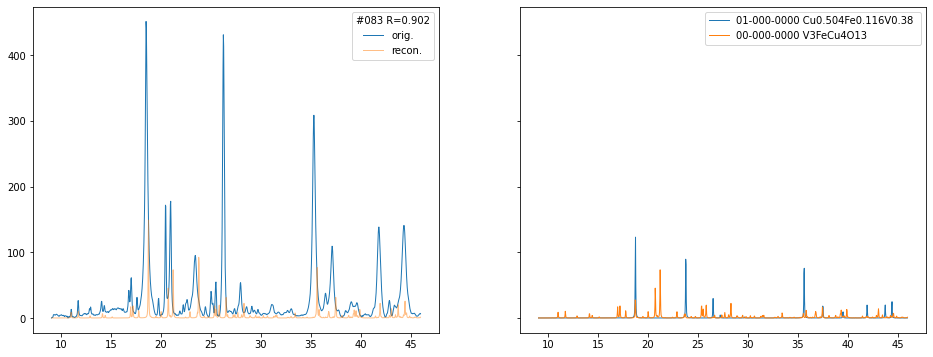

In [503]:
sample.plot(perphase=True)

In [510]:
new_sample = deepcopy(sample)
new_sample = new_sample.optimize(num_epoch=20, print_prog=True, loss_weight=loss_weight)


x tensor([[0.6444, 0.3556]], grad_fn=<SumBackward1>)
entropy tensor([0.6508], grad_fn=<NegBackward0>) tensor(0.6508, grad_fn=<MeanBackward0>)
loss tensor(0.8372, grad_fn=<DivBackward0>) tensor(0.6508, grad_fn=<MeanBackward0>) tensor(5.1667e-05, grad_fn=<MseLossBackward0>)
0 5.153238 tensor(0.8372) tensor(5.1667e-05) tensor(0.6508)
x tensor([[0.3702, 0.6298]], grad_fn=<SumBackward1>)
entropy tensor([0.6590], grad_fn=<NegBackward0>) tensor(0.6590, grad_fn=<MeanBackward0>)
loss tensor(0.8061, grad_fn=<DivBackward0>) tensor(0.6590, grad_fn=<MeanBackward0>) tensor(8.8509e-05, grad_fn=<MseLossBackward0>)
x tensor([[0.3555, 0.6445]], grad_fn=<SumBackward1>)
entropy tensor([0.6508], grad_fn=<NegBackward0>) tensor(0.6508, grad_fn=<MeanBackward0>)
loss tensor(0.8027, grad_fn=<DivBackward0>) tensor(0.6508, grad_fn=<MeanBackward0>) tensor(9.0148e-05, grad_fn=<MseLossBackward0>)
x tensor([[0.3216, 0.6784]], grad_fn=<SumBackward1>)
entropy tensor([0.6280], grad_fn=<NegBackward0>) tensor(0.6280, grad

In [511]:
new_sample.refine_all_fractions()

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

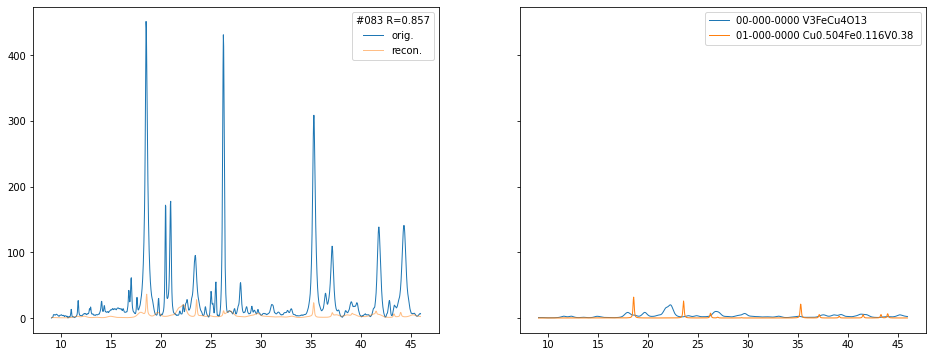

In [515]:
new_sample.plot(perphase=True)

In [514]:
new_sample.refine_one_by_one()

In [491]:
new_sample.comp_loss

0.00012199999999999996

In [ ]:
i=83
solution = []
for e in (entries[75],entries[76]):
    phase = Phase.from_entry_and_instance_data(e, 1 / len(entries), instance_data)
    solution.append(phase)

In [522]:

for i in [83]: #range(instance_data.sample_num):
    solution_file = f'solution/samples{i}.json'
    if os.path.exists(solution_file):
        continue
        with open(solution_file) as f:
            sample = json.load(f, cls=MontyDecoder)
        continue
    else:
        print(f'Solving sample {i} ......')
        solution = [Phase.from_entry_and_instance_data(entries[-1], 1, instance_data,width=0.1)]
        
        solution = []
        for e in (entries[75],entries[76]):
            phase = Phase.from_entry_and_instance_data(e, 1 / 2, instance_data)
            solution.append(phase)

        sample = Sample(i, instance_data.log_q, instance_data.sample_xrd[i], instance_data.chemsys,
                        instance_data.sample_comp[i], oxide_system, instance_data.wavelength, max_q_shift, solution)
#         sample.prune_candidates_based_on_composition(cutoff=0.05)
#         sample.prune_candidate_based_on_xrd(plot=True, cutoff=0.1, saveplot=f'initial_pruning/fig_{i}.pdf')
        #sample.print_solution()
        
        
#         if len(sample.solution)>0 and len(sample.solution)<30:
#             print (sample.sample_id,len(sample.solution))
#             solution_file = f'solution/samples{i}.json'
#             with open(solution_file, 'w') as f:
#                 json.dump(sample, f, cls=MontyEncoder)
    
        
        
# #         print(sample.sample_id, sample.loss(loss_weight))
        
        new_sample = deepcopy(sample)
        
#         #new_sample.refine_all_fractions()
#         #new_sample.refine_one_by_one()
        
        new_sample = new_sample.optimize(num_epoch=15, print_prog=True, loss_weight=loss_weight)
        new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
        new_sample.refine_all_fractions()
        new_sample.refine_one_by_one()
        new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
        new_sample.print_solution()
        #new_sample.refine_all_fractions()
#         new_sample = new_sample.optimize(num_epoch=1000, print_prog=True, loss_weight=loss_weight)
#         new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
#         new_sample.refine_one_by_one()
#         new_sample.refine_all_fractions()
#         new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
#        print(new_sample.loss(loss_weight))
#         if new_sample.loss(loss_weight) <= sample.loss(loss_weight):
#             #sample.print_solution()
#             new_sample.print_solution()
#             #samples[sample.sample_id] = new_sample
#             solution_file = f'solution/samples{i}.json'
#             with open(solution_file, 'w') as f:
#                 json.dump(new_sample, f, cls=MontyEncoder)
#             print(sample.sample_id, sample.loss(loss_weight))


Solving sample 83 ......
x tensor([[0.5701, 0.4299]], grad_fn=<SumBackward1>)
entropy tensor([0.6833], grad_fn=<NegBackward0>) tensor(0.6833, grad_fn=<MeanBackward0>)
loss tensor(0.9522, grad_fn=<DivBackward0>) tensor(0.6833, grad_fn=<MeanBackward0>) tensor(6.2905e-05, grad_fn=<MseLossBackward0>)
0 5.8501387 tensor(0.9522) tensor(6.2905e-05) tensor(0.6833)
x tensor([[0.3197, 0.6803]], grad_fn=<SumBackward1>)
entropy tensor([0.6267], grad_fn=<NegBackward0>) tensor(0.6267, grad_fn=<MeanBackward0>)
loss tensor(0.8076, grad_fn=<DivBackward0>) tensor(0.6267, grad_fn=<MeanBackward0>) tensor(9.4008e-05, grad_fn=<MseLossBackward0>)
x tensor([[0.2954, 0.7046]], grad_fn=<SumBackward1>)
entropy tensor([0.6069], grad_fn=<NegBackward0>) tensor(0.6069, grad_fn=<MeanBackward0>)
loss tensor(0.7917, grad_fn=<DivBackward0>) tensor(0.6069, grad_fn=<MeanBackward0>) tensor(9.6544e-05, grad_fn=<MseLossBackward0>)
x tensor([[0.2570, 0.7430]], grad_fn=<SumBackward1>)
entropy tensor([0.5699], grad_fn=<NegBackw

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

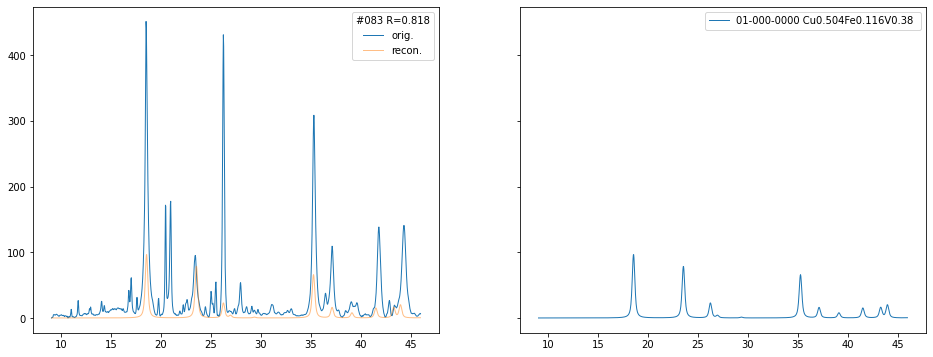

In [523]:
new_sample.plot(perphase=True)



In [526]:
new_sample.print_loss(loss_weight)

 W-sum | XRD | Comp | Entropy 
 4.0127  0.6688  0.0000  0.0000
